In [1]:
import os
os.getcwd()

'/home/azhasc'

In [2]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/home/azhasc/anaconda3/lib/python3.8/site-packages/fastbook/__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [6]:
dir_path = os.getcwd()+"/bing_image_downloader/dataset/dog/husky dog/"
d={}
files = os.listdir(dir_path)
for each_file in files:
    if each_file.endswith("jpg"):
        d[each_file] = open(dir_path+each_file,"rb")


## This is just for husky

In [7]:

#get the image files from the dir
fol = get_image_files(dir_path)

#verify which files are corrupted
failed = verify_images(fol)

#unlink corrupt ones
failed.map(Path.unlink);



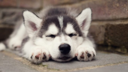

In [8]:
#open one image and check

im = Image.open(fol[1])
im.to_thumb(128,128)

In [9]:
dog_types = 'husky', 'german shepherd', 'labrador'

dir_path_1 = os.getcwd()+"/bing_image_downloader/dataset/dog/"


## This is for all dogs

In [10]:
fns = get_image_files(dir_path_1)

failed1 = verify_images(fns)

failed1.map(Path.unlink);

In [51]:
dogs = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=0.2,seed=42),
        get_y = parent_label,
        item_tfms = Resize(128),
        )

In [52]:
dls = dogs.dataloaders(dir_path_1)

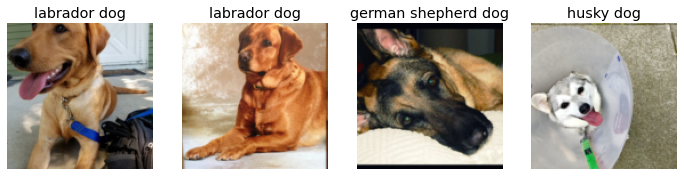

In [34]:
dls.valid.show_batch(max_n=4, nrows=1)

## Resize methods ( eg: Squish, Pad, etc)

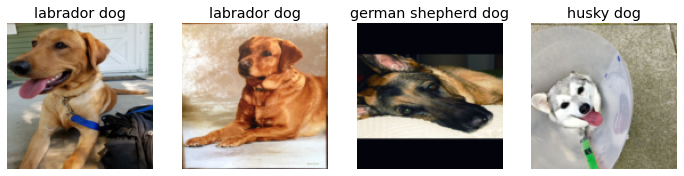

In [35]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(dir_path_1)
dls.valid.show_batch(max_n=4, nrows=1)

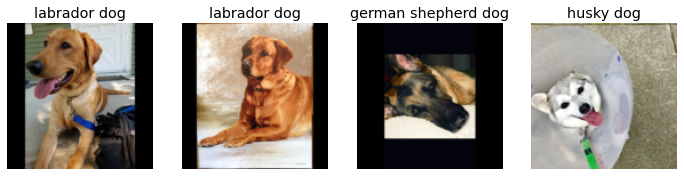

In [36]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(dir_path_1)
dls.valid.show_batch(max_n=4, nrows=1)

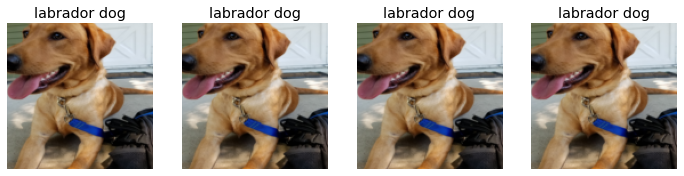

In [37]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(dir_path_1)
dls.valid.show_batch(max_n=4, nrows=1, unique = True)

## Data Augmentation

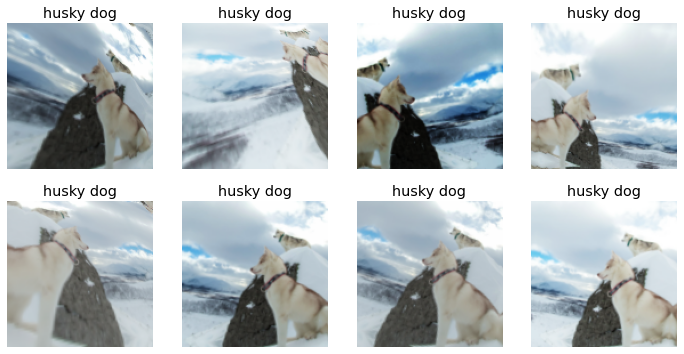

In [53]:
dogs = dogs.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = dogs.dataloaders(dir_path_1)
dls.train.show_batch(max_n = 8, nrows = 2, unique = True)

In [61]:
dogs = dogs.new(item_tfms = RandomResizedCrop(224, min_scale=0.5), batch_tfms = aug_transforms())
dls = dogs.dataloaders(dir_path_1)

In [62]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.765100,0.435443,0.135593,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.652219,0.261208,0.101695,00:08
1,0.448384,0.227660,0.101695,00:08
2,0.328738,0.214495,0.101695,00:08
3,0.267566,0.206541,0.101695,00:08


## Confusion Matrix

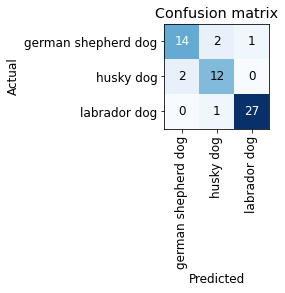

In [63]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

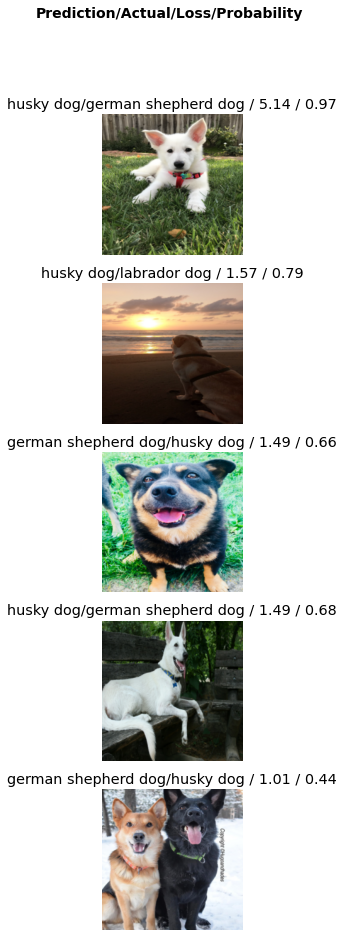

In [66]:
inter.plot_top_losses(5,nrows=5)

In [67]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [71]:
learn.export()

In [72]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [73]:
learn_inf = load_learner(path/'export.pkl')

In [75]:
learn_inf.predict('husky.jpg')

('husky dog', tensor(1), tensor([5.1930e-05, 9.9985e-01, 9.8173e-05]))

In [76]:
learn_inf.dls.vocab

['german shepherd dog', 'husky dog', 'labrador dog']

In [77]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [101]:

btn_upload = SimpleNamespace(data = ['husky.jpg'])

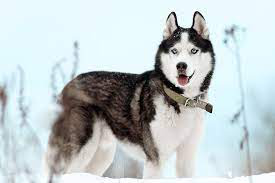

In [102]:
img = PILImage.create(btn_upload.data[-1])
img

In [103]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [104]:
pred,pred_idx,probs = learn_inf.predict(img)

In [105]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: husky dog; Probability: 0.9998')

In [106]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

In [107]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)


In [108]:
btn_upload = widgets.FileUpload()

In [109]:

VBox([widgets.Label('Select your dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])